# **Task 04**
### TIMELINE ANALYSIS COVID-19 in Tableau & Python
## The Sparks Foundation
### Data Science & Business Analytics
### *Muhammad Atif Shahzad*
- email: matifsh2@hotmail.com
### GRIP October 2022

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [12]:
covid_df= pd.read_csv("pk_covid.csv")

In [13]:
covid_df.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,03/02/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [10]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            848 non-null    object 
 1   Cases           848 non-null    float64
 2   Deaths          848 non-null    float64
 3   Recovered       848 non-null    float64
 4   Travel_history  847 non-null    object 
 5   Province        847 non-null    object 
 6   City            847 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.6+ KB


In [14]:
covid_df['Date']=pd.to_datetime(covid_df['Date'])

In [15]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            847 non-null    datetime64[ns]
 1   Cases           847 non-null    int64         
 2   Deaths          847 non-null    int64         
 3   Recovered       847 non-null    int64         
 4   Travel_history  847 non-null    object        
 5   Province        847 non-null    object        
 6   City            847 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 46.4+ KB


In [17]:
covid_df.describe()

,Cases,Deaths,Recovered
count,847.000000,847.000000,847.000000
mean,9.935065,0.198347,2.520661
std,22.721862,0.790515,16.062577
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,8.000000,0.000000,0.000000
max,366.000000,10.000000,273.000000


In [18]:
covid_df.isnull().sum()

Date              0
Cases             0
Deaths            0
Recovered         0
Travel_history    0
Province          0
City              0
dtype: int64

In [21]:
covid_df.drop(['Travel_history'], axis=1, inplace= True)

In [22]:
covid_df.tail()

,Date,Cases,Deaths,Recovered,Province,City
842,2020-04-19,76,0,0,Punjab,Lodhran
843,2020-04-19,5,0,0,Punjab,Khanewal
844,2020-04-19,5,0,0,Punjab,Toba Tek Singh
845,2020-04-19,3,0,0,Punjab,Sheikhupura
846,2020-04-19,1,0,0,Punjab,Bhakhar


In [23]:
covid_df

,Date,Cases,Deaths,Recovered,Province,City
0,2020-02-26,1,0,0,Islamabad Capital Territory,Islamabad
1,2020-02-26,2,0,0,Sindh,Karachi
2,2020-02-29,1,0,0,Islamabad Capital Territory,Islamabad
3,2020-02-29,1,0,0,Sindh,Karachi
4,2020-03-02,1,0,0,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...
842,2020-04-19,76,0,0,Punjab,Lodhran
843,2020-04-19,5,0,0,Punjab,Khanewal
844,2020-04-19,5,0,0,Punjab,Toba Tek Singh
845,2020-04-19,3,0,0,Punjab,Sheikhupura


In [27]:
province_wise=pd.pivot_table(covid_df, values=['Cases', "Deaths", "Recovered"], index="Province",aggfunc=max)

In [29]:
province_wise['Recovered_Rate']=province_wise['Recovered']*100/province_wise['Cases']

In [30]:
province_wise['Death_Rate']=province_wise['Deaths']*100/province_wise['Cases']

In [32]:
province_wise.style.background_gradient(cmap='cubehelix')

,Cases,Deaths,Recovered,Recovered_Rate,Death_Rate
Province,,,,,
Azad Jummu Kashmir,10,0,1,10.000000,0.000000
Baluchistan,56,2,59,105.357143,3.571429
Federal Administration Tribal Area,9,0,3,33.333333,0.000000
Gilgit-Baltistan,37,1,28,75.675676,2.702703
Islamabad Capital Territory,35,1,7,20.000000,2.857143
Khyber Pakhtunkhwa,84,10,48,57.142857,11.904762
Punjab,366,7,233,63.661202,1.912568
Sindh,182,8,273,150.000000,4.395604
khyber Pakhtunkhwa,1,0,0,0.000000,0.000000


In [82]:
# Top 10 cities with active case
top_cities= covid_df.groupby(covid_df['City']).max()[['Date','Cases']].sort_values(by=['Cases'], ascending=False).reset_index()


In [83]:
top_cities

,City,Date,Cases
0,Multan,2020-04-19,366
1,Raiwind,2020-04-14,213
2,Karachi,2020-04-19,182
3,Sukkur,2020-04-18,119
4,Ghotki,2020-04-17,96
...,...,...,...
100,Pakpatan,2020-04-14,1
101,Shujawal,2020-04-08,1
102,Hangu,2020-03-18,1
103,Jacobabad,2020-03-31,1


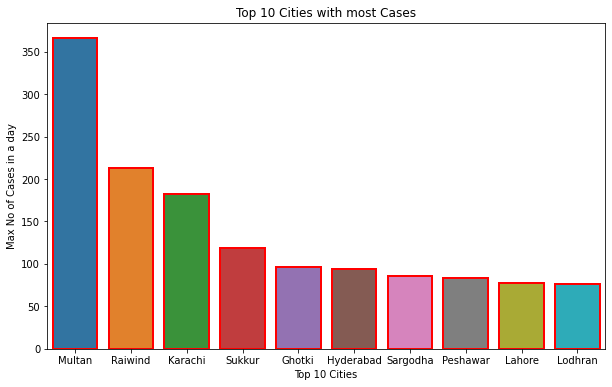

In [103]:
plt.figure(figsize=(10,6))
plt.title("Top 10 Cities with most Cases")
sns.barplot(data= top_cities.iloc[:10],x='City', y='Cases', linewidth=2, edgecolor='red')
plt.xlabel("Top 10 Cities")
plt.ylabel("Max No of Cases in a day")
plt.show()

In [69]:
covid_df.columns

Index(['Date', 'Cases', 'Deaths', 'Recovered', 'Province', 'City'], dtype='object')

In [98]:
# Top 10 cities affected by death due to covid 19
top_cities_by_death= covid_df.groupby(covid_df['City']).max()[['Deaths','Date']].sort_values(by=['Deaths'], ascending=False).reset_index()


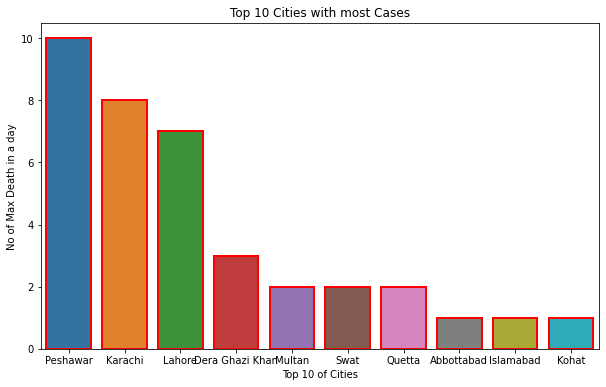

In [102]:
plt.figure(figsize=(10,6))
plt.title("Top 10 Cities with most Cases")
sns.barplot(data= top_cities_by_death.iloc[:10],x='City', y='Deaths', linewidth=2, edgecolor='red')
plt.xlabel("Top 10 of Cities")
plt.ylabel("No of Max Death in a day")
plt.show()

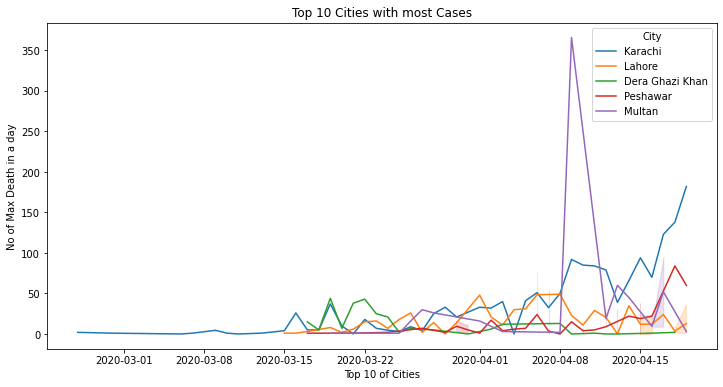

In [107]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Cities with most Cases")
sns.lineplot(data= covid_df[covid_df['City'].isin(['Peshawar','Karachi','Lahore','Dera Ghazi Khan','Multan'])],x='Date', y='Cases',hue="City")
plt.xlabel("Top 10 of Cities")
plt.ylabel("No of Max Death in a day")
plt.show()

In [162]:
# to Check total No of Confirmed Cases Citywise in a month
Total_no_cases_citywise=covid_df.groupby(covid_df['City']).sum()[['Cases']].sort_values(by=['Cases'],ascending=False).reset_index().head(10)

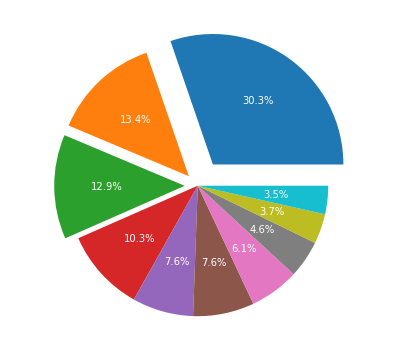

In [193]:


from turtle import color


plt.figure(figsize=(12,6))
my_explode = (0.2, 0.1, 0.1,0,0,0,0,0,0,0)
my_labels=[]
for i in Total_no_cases_citywise['City']:
    my_labels.append(i)
    
plt.pie(Total_no_cases_citywise['Cases'],labels=my_labels,autopct='%1.1f%%',explode=my_explode,textprops={'color':'white'})
plt.title('Top 10 Cities with Maxinum No of Cases',fontweight='bold', color='w')
plt.show()



In [165]:
Total_no_cases_citywise

,City,Cases
0,Karachi,1610
1,Multan,712
2,Lahore,688
3,Raiwind,546
4,Quetta,403
5,Peshawar,403
6,Sukkur,326
7,Dera Ghazi Khan,247
8,Hyderabad,197
9,Rawalpindi,187
